# Zadanie 1: Minimalizacja funkcji metodą gradientu prostego

## Treść zadania
Naszym celem jest znalezienie minimum funkcji $f(x, y) = \log((x + 3y)^2)$ w dziedzinie $x \in [1, 10], y \in [1, 10]$.
Wykorzystamy do tego **metodę gradientu prostego** (Gradient Descent).

### Co to jest gradient?
Gradient to wektor, który wskazuje kierunek najszybszego wzrostu funkcji. Aby znaleźć minimum (czyli "zejść w dół"), musimy poruszać się w kierunku **przeciwnym** do gradientu.

Wzór na aktualizację punktu w każdym kroku:
$$ (x_{new}, y_{new}) = (x_{old}, y_{old}) - \alpha \cdot \nabla f(x, y) $$
gdzie $\alpha$ (learning rate) to współczynnik uczenia (jak duże kroki robimy).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Konfiguracja wielkości wykresów
plt.rcParams['figure.figsize'] = [10, 8]

In [2]:
# 1. Definicja funkcji f(x, y)
def f(x, y):
    # f(x, y) = log((x + 3y)^2)
    # Używamy np.log (logarytm naturalny)
    return np.log((x + 3 * y)**2)

# 2. Definicja gradientu funkcji (pochodne cząstkowe)
def gradient_f(x, y):
    # Pochodna po x: df/dx = 1 / (x+3y)^2 * 2(x+3y) * 1 = 2 / (x+3y)
    # Pochodna po y: df/dy = 1 / (x+3y)^2 * 2(x+3y) * 3 = 6 / (x+3y)
    
    denom = x + 3 * y
    df_dx = 2 / denom
    df_dy = 6 / denom
    return np.array([df_dx, df_dy])

# 3. Algorytm Gradient Descent
def gradient_descent(start_x, start_y, learning_rate, num_steps):
    path = [] # Lista do zapisywania kolejnych kroków (do wizualizacji)
    
    current_x = start_x
    current_y = start_y
    path.append([current_x, current_y, f(current_x, current_y)])
    
    for i in range(num_steps):
        grad = gradient_f(current_x, current_y)
        
        # Aktualizacja wag: x = x - learning_rate * gradient
        current_x = current_x - learning_rate * grad[0]
        current_y = current_y - learning_rate * grad[1]
        
        # Ograniczenie do dziedziny [1, 10] (Projected Gradient Descent)
        # Jeśli wyjdziemy poza zakres, wracamy na brzeg
        current_x = np.clip(current_x, 1, 10)
        current_y = np.clip(current_y, 1, 10)
        
        path.append([current_x, current_y, f(current_x, current_y)])
        
    return np.array(path)

# Parametry symulacji
start_x = 8.0
start_y = 9.0
learning_rate = 1.0 # Duży krok, bo funkcja jest płaska daleko od 0
steps = 50

# Uruchomienie
path = gradient_descent(start_x, start_y, learning_rate, steps)

print("Punkt startowy:", path[0])
print("Punkt końcowy:", path[-1])
print("Wartość minimalna znaleziona:", path[-1][2])

Punkt startowy: [8.         9.         7.11069612]
Punkt końcowy: [1.         1.         2.77258872]
Wartość minimalna znaleziona: 2.772588722239781


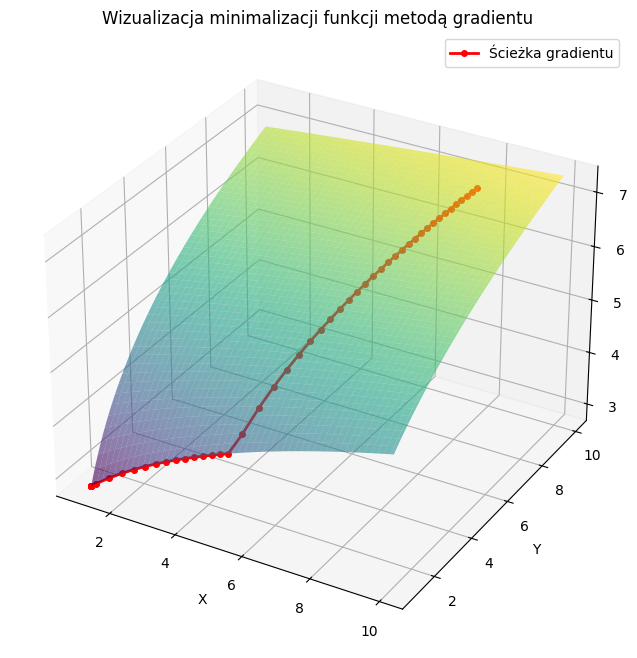

In [3]:
# Wizualizacja 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Siatka punktów do wykresu funkcji
x_range = np.linspace(1, 10, 100)
y_range = np.linspace(1, 10, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

# Rysowanie powierzchni funkcji
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# Rysowanie ścieżki gradientu (czerwone kropki i linia)
path_x = path[:, 0]
path_y = path[:, 1]
path_z = path[:, 2]

ax.plot(path_x, path_y, path_z, color='red', marker='o', markersize=4, linewidth=2, label='Ścieżka gradientu')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title('Wizualizacja minimalizacji funkcji metodą gradientu')
ax.legend()

plt.show()

# Zadanie 2: Obliczanie gradientów sieci neuronowej (NumPy)

## Treść zadania
Mamy zadaną architekturę sieci neuronowej:
```python
nn_architecture = [
    {"input_dim": 2, "output_dim": 2, "activation": "tanh"},
    {"input_dim": 2, "output_dim": 1, "activation": "tanh"}
]
```
Naszym zadaniem jest zaimplementowanie **propagacji w przód (forward propagation)** oraz **propagacji wstecznej (backward propagation)**, aby obliczyć gradienty. Użyjemy do tego biblioteki NumPy.

### Wyjaśnienie dla początkujących
Sieć neuronowa to ciąg operacji macierzowych.
1. **Warstwa**: Mnożymy wejście przez macierz wag $W$ i dodajemy wektor biasów $b$. Wynik to $Z$.
2. **Aktywacja**: Na wynik $Z$ nakładamy funkcję nieliniową (tu: `tanh`). Wynik to $A$.
3. **Backward**: Aby sieć się uczyła, musimy wiedzieć, jak zmiana wag wpłynie na błąd. Obliczamy to cofając się od końca sieci do początku (łańcuchowa reguła pochodnych).

In [4]:
# Definicja architektury
nn_architecture = [
    {"input_dim": 2, "output_dim": 2, "activation": "tanh"},
    {"input_dim": 2, "output_dim": 1, "activation": "tanh"}
]

# Inicjalizacja parametrów (Wag i Biasów)
def init_layers(nn_architecture, seed=42):
    np.random.seed(seed)
    params_values = {}

    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        layer_input_size = layer["input_dim"]
        layer_output_size = layer["output_dim"]
        
        # Inicjalizacja losowa wag (małe liczby)
        # Wymiar: [wyjście x wejście]
        params_values['W' + str(layer_idx)] = np.random.randn(layer_output_size, layer_input_size) * 0.1
        
        # Inicjalizacja biasów (zera lub małe liczby)
        # Wymiar: [wyjście x 1]
        params_values['b' + str(layer_idx)] = np.random.randn(layer_output_size, 1) * 0.1
        
    return params_values

print("Zainicjowane parametry:")
params = init_layers(nn_architecture)
for key, value in params.items():
    print(f"{key}: kształt {value.shape}")

Zainicjowane parametry:
W1: kształt (2, 2)
b1: kształt (2, 1)
W2: kształt (1, 2)
b2: kształt (1, 1)


In [5]:
# Funkcje aktywacji i ich pochodne

# Tangens hiperboliczny (tanh)
def tanh(Z):
    return np.tanh(Z)

# Pochodna tanh
# Jeśli A = tanh(Z), to pochodna wynosi 1 - A^2
def tanh_backward(dA, Z):
    A = np.tanh(Z)
    dZ = dA * (1 - A**2)
    return dZ

# Słownik mapujący nazwy do funkcji
activation_functions = {
    "tanh": tanh
}
backward_activation_functions = {
    "tanh": tanh_backward
}

In [6]:
# Propagacja w przód (Forward Propagation)
def single_layer_forward_propagation(A_prev, W_curr, b_curr, activation="tanh"):
    # Obliczenie Z = W * A + b
    Z_curr = np.dot(W_curr, A_prev) + b_curr
    
    # Zastosowanie funkcji aktywacji
    if activation == "tanh":
        activation_func = tanh
    else:
        raise Exception('Nieobsługiwana funkcja aktywacji')
        
    return activation_func(Z_curr), Z_curr

def full_forward_propagation(X, params_values, nn_architecture):
    memory = {} # Pamięć do przechowywania wartości pośrednich (potrzebne do backward)
    A_curr = X # A0 to po prostu wejście X
    
    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        A_prev = A_curr
        
        activ_function_curr = layer["activation"]
        W_curr = params_values["W" + str(layer_idx)]
        b_curr = params_values["b" + str(layer_idx)]
        
        # Obliczenie warstwy
        A_curr, Z_curr = single_layer_forward_propagation(A_prev, W_curr, b_curr, activ_function_curr)
        
        # Zapisanie do pamięci
        memory["A" + str(idx)] = A_prev
        memory["Z" + str(layer_idx)] = Z_curr
       
    return A_curr, memory

In [7]:
# Propagacja wsteczna (Backward Propagation)
def single_layer_backward_propagation(dA_curr, W_curr, b_curr, Z_curr, A_prev, activation="tanh"):
    m = A_prev.shape[1] # Liczba przykładów
    
    if activation == "tanh":
        backward_activation_func = tanh_backward
    else:
        raise Exception('Nieobsługiwana funkcja aktywacji')
    
    # Obliczenie dZ (gradient funkcji kosztu względem Z)
    dZ_curr = backward_activation_func(dA_curr, Z_curr)
    
    # Obliczenie dW (gradient względem wag)
    dW_curr = np.dot(dZ_curr, A_prev.T) / m
    
    # Obliczenie db (gradient względem biasów)
    db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / m
    
    # Obliczenie dA_prev (gradient do przekazania do poprzedniej warstwy)
    dA_prev = np.dot(W_curr.T, dZ_curr)

    return dA_prev, dW_curr, db_curr

def full_backward_propagation(Y_hat, Y, memory, params_values, nn_architecture):
    grads_values = {}
    m = Y.shape[1]
    Y = Y.reshape(Y_hat.shape)
    
    # Inicjalizacja gradientu od ostatniej warstwy (funkcja kosztu MSE)
    # Zakładamy Mean Squared Error: L = (Y_hat - Y)^2
    # Pochodna dL/dA = 2 * (Y_hat - Y)
    dA_prev = 2 * (Y_hat - Y)
    
    # Iteracja od ostatniej warstwy do pierwszej
    for layer_idx_prev, layer in reversed(list(enumerate(nn_architecture))):
        layer_idx_curr = layer_idx_prev + 1
        activ_function_curr = layer["activation"]
        
        dA_curr = dA_prev
        
        A_prev = memory["A" + str(layer_idx_prev)]
        Z_curr = memory["Z" + str(layer_idx_curr)]
        W_curr = params_values["W" + str(layer_idx_curr)]
        b_curr = params_values["b" + str(layer_idx_curr)]
        
        dA_prev, dW_curr, db_curr = single_layer_backward_propagation(
            dA_curr, W_curr, b_curr, Z_curr, A_prev, activ_function_curr)
        
        grads_values["dW" + str(layer_idx_curr)] = dW_curr
        grads_values["db" + str(layer_idx_curr)] = db_curr
    
    return grads_values

In [8]:
# Test działania (Symulacja)

# Przykładowe dane wejściowe (4 przykłady, 2 cechy)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T # Transpozycja, żeby cechy były w wierszach
# Przykładowe oczekiwane wyjścia
Y = np.array([[0], [1], [1], [0]]).T

print("Kształt X:", X.shape)
print("Kształt Y:", Y.shape)

# 1. Inicjalizacja
params_values = init_layers(nn_architecture)

# 2. Forward Pass
Y_hat, memory = full_forward_propagation(X, params_values, nn_architecture)
print("\nWyjście sieci (Y_hat) przed treningiem:\n", Y_hat)

# 3. Backward Pass (Obliczenie gradientów)
grads = full_backward_propagation(Y_hat, Y, memory, params_values, nn_architecture)

print("\nObliczone gradienty dla ostatniej warstwy (dW2):")
print(grads["dW2"])
print("\nTo są wartości, o które (pomnożone przez learning rate) zmienilibyśmy wagi, aby zmniejszyć błąd.")

Kształt X: (2, 4)
Kształt Y: (1, 4)

Wyjście sieci (Y_hat) przed treningiem:
 [[-0.05239304 -0.04296253 -0.03960933 -0.03029641]]

Obliczone gradienty dla ostatniej warstwy (dW2):
[[ 0.00617609 -0.09045411]]

To są wartości, o które (pomnożone przez learning rate) zmienilibyśmy wagi, aby zmniejszyć błąd.
